In [52]:
import pandas as pd
from visualizations import *
import os
import joblib

# EDA

In [2]:
df = pd.read_csv("../dataset/hand_landmarks_data.csv")
df.head()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,262.669968,257.304901,-3.649205e-07,257.417542,247.109055,0.004224,246.882957,241.716827,0.005798,236.384537,...,223.345093,255.490692,-0.020450,215.043365,258.114746,-0.024577,208.006393,259.608673,-0.026722,call
1,83.351778,346.059113,-2.345265e-07,81.925037,328.562347,-0.011102,90.080132,311.535248,-0.021096,95.641823,...,132.451618,341.794434,-0.038175,142.773582,342.829254,-0.037336,152.431698,343.015991,-0.036136,call
2,187.756977,260.235492,-2.417307e-07,195.460579,241.506035,-0.000184,207.259529,223.674339,-0.009687,215.413628,...,250.301010,268.602938,-0.044068,262.425133,271.276638,-0.040469,272.989952,272.272231,-0.038301,call
3,114.976696,331.594238,-1.233261e-07,114.503494,320.549957,-0.002824,116.636627,310.080994,-0.008911,117.685066,...,145.195450,329.357544,-0.027622,151.053200,329.712341,-0.027863,155.990364,329.548828,-0.027723,call
4,188.795288,141.727867,-1.622995e-07,188.520905,127.947464,-0.002884,191.982880,111.010563,-0.008115,192.552521,...,226.696396,132.263248,-0.025113,234.831741,130.684147,-0.024087,241.587769,128.477188,-0.023486,call


In [3]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 25675 entries, 0 to 25674
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      25675 non-null  float64
 1   y1      25675 non-null  float64
 2   z1      25675 non-null  float64
 3   x2      25675 non-null  float64
 4   y2      25675 non-null  float64
 5   z2      25675 non-null  float64
 6   x3      25675 non-null  float64
 7   y3      25675 non-null  float64
 8   z3      25675 non-null  float64
 9   x4      25675 non-null  float64
 10  y4      25675 non-null  float64
 11  z4      25675 non-null  float64
 12  x5      25675 non-null  float64
 13  y5      25675 non-null  float64
 14  z5      25675 non-null  float64
 15  x6      25675 non-null  float64
 16  y6      25675 non-null  float64
 17  z6      25675 non-null  float64
 18  x7      25675 non-null  float64
 19  y7      25675 non-null  float64
 20  z7      25675 non-null  float64
 21  x8      25675 non-null  float64
 22  y8      2

In [4]:
# converting float64 to float32 to save memory
df_f32 = df.copy()

float_cols = df.select_dtypes(include="float64").columns
df_f32[float_cols] = df[float_cols].astype("float32")

In [5]:
df_f32.info()

<class 'pandas.DataFrame'>
RangeIndex: 25675 entries, 0 to 25674
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      25675 non-null  float32
 1   y1      25675 non-null  float32
 2   z1      25675 non-null  float32
 3   x2      25675 non-null  float32
 4   y2      25675 non-null  float32
 5   z2      25675 non-null  float32
 6   x3      25675 non-null  float32
 7   y3      25675 non-null  float32
 8   z3      25675 non-null  float32
 9   x4      25675 non-null  float32
 10  y4      25675 non-null  float32
 11  z4      25675 non-null  float32
 12  x5      25675 non-null  float32
 13  y5      25675 non-null  float32
 14  z5      25675 non-null  float32
 15  x6      25675 non-null  float32
 16  y6      25675 non-null  float32
 17  z6      25675 non-null  float32
 18  x7      25675 non-null  float32
 19  y7      25675 non-null  float32
 20  z7      25675 non-null  float32
 21  x8      25675 non-null  float32
 22  y8      2

In [6]:
# save the processed dataframe to a new CSV file
df_f32.to_csv("../dataset/hand_landmarks_data_f32.csv", index=False)

### Data Cleaning

In [7]:
# load new preprocessed data
df = pd.read_csv("../dataset/hand_landmarks_data_f32.csv")
df.head()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,262.669980,257.30490,-3.649205e-07,257.417540,247.109050,0.004224,246.88297,241.71683,0.005798,236.38454,...,223.34510,255.49069,-0.020450,215.04337,258.11475,-0.024577,208.00640,259.60867,-0.026722,call
1,83.351776,346.05910,-2.345265e-07,81.925030,328.562350,-0.011102,90.08013,311.53525,-0.021096,95.64182,...,132.45161,341.79443,-0.038175,142.77359,342.82925,-0.037336,152.43170,343.01600,-0.036136,call
2,187.756970,260.23550,-2.417307e-07,195.460570,241.506040,-0.000184,207.25954,223.67435,-0.009687,215.41362,...,250.30101,268.60294,-0.044068,262.42514,271.27664,-0.040469,272.98996,272.27222,-0.038301,call
3,114.976700,331.59424,-1.233261e-07,114.503494,320.549960,-0.002824,116.63663,310.08100,-0.008911,117.68507,...,145.19545,329.35754,-0.027622,151.05319,329.71234,-0.027863,155.99036,329.54883,-0.027723,call
4,188.795290,141.72787,-1.622995e-07,188.520900,127.947464,-0.002884,191.98288,111.01056,-0.008115,192.55252,...,226.69640,132.26324,-0.025113,234.83174,130.68414,-0.024087,241.58777,128.47719,-0.023486,call


In [8]:
df["label"].value_counts()

label
three2             1653
palm               1649
four               1634
ok                 1592
stop_inverted      1567
call               1506
peace_inverted     1497
stop               1482
rock               1458
three              1456
peace              1441
like               1436
two_up_inverted    1371
two_up             1343
dislike            1295
one                1263
mute               1087
fist                945
Name: count, dtype: int64

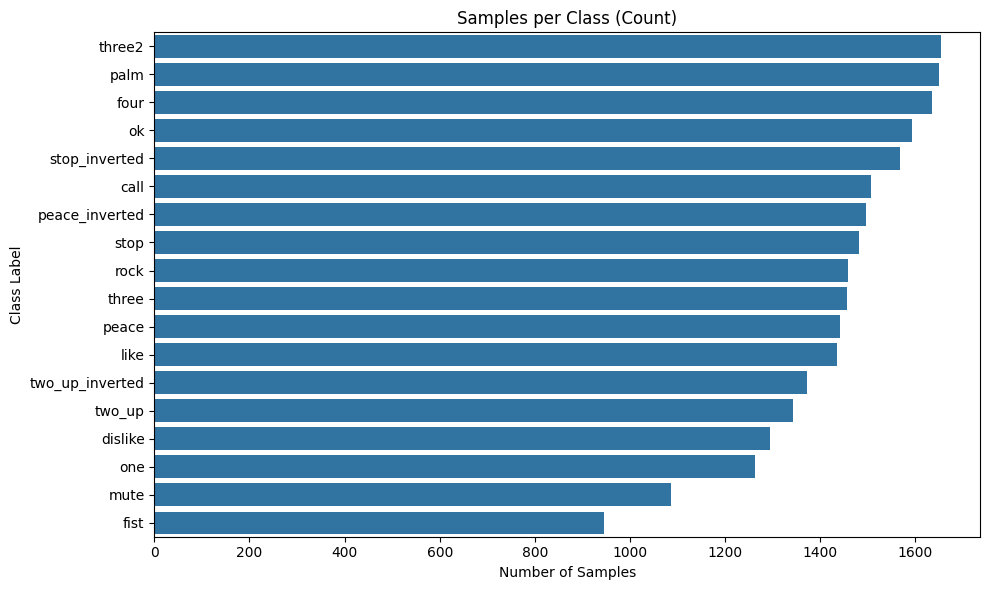

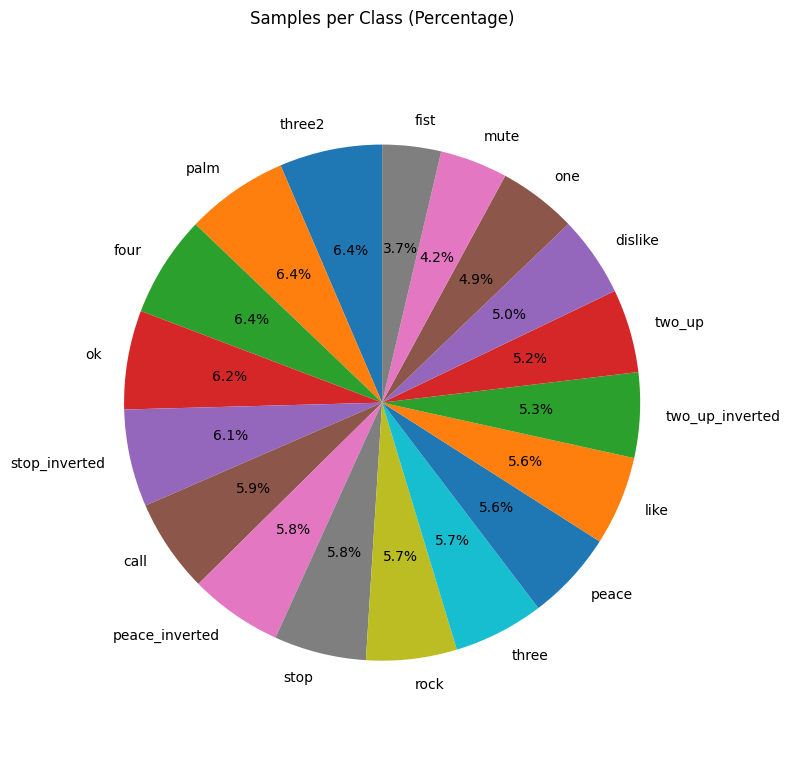

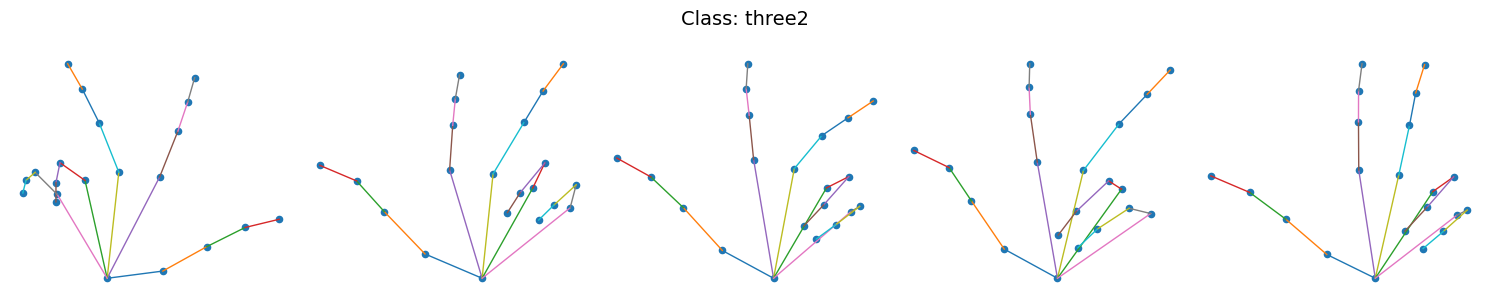

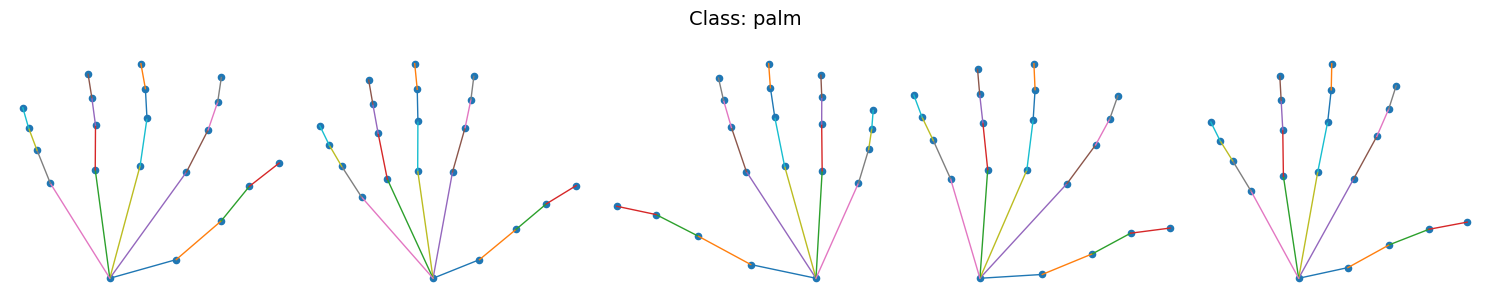

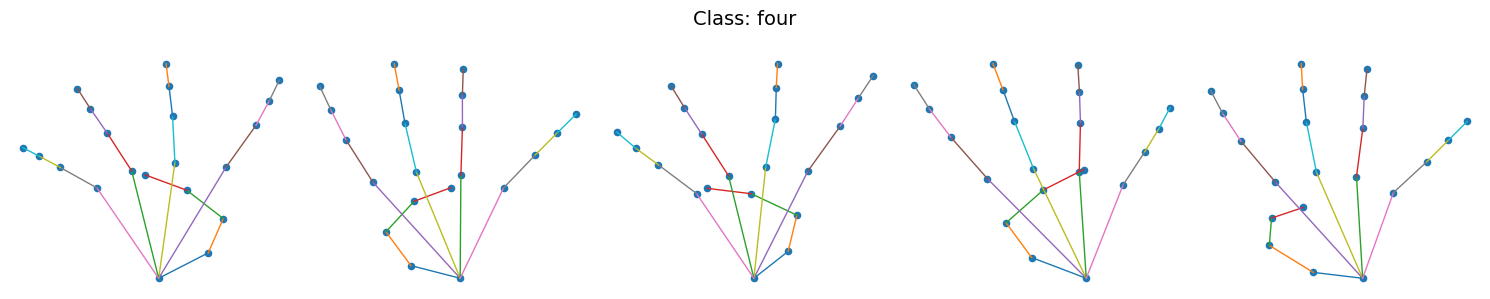

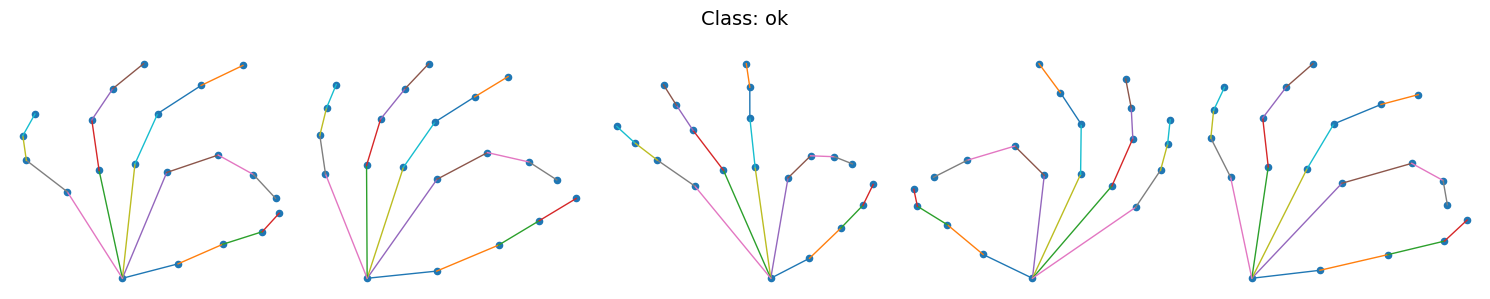

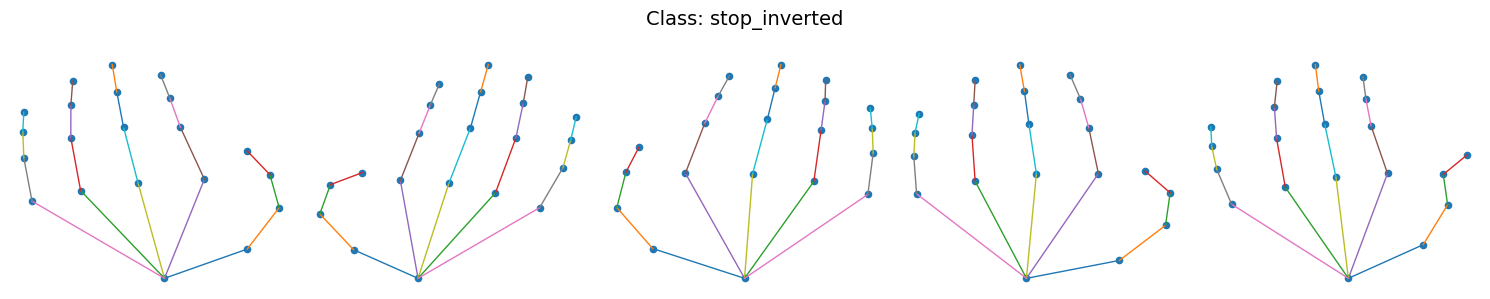

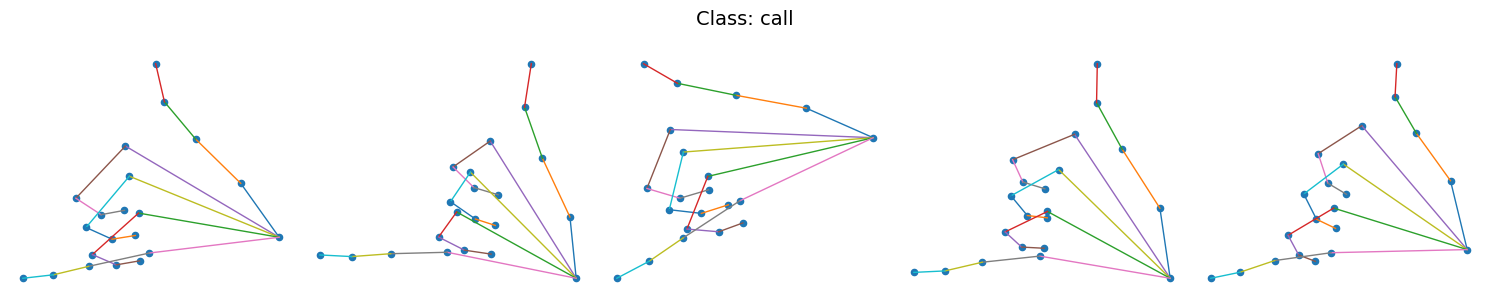

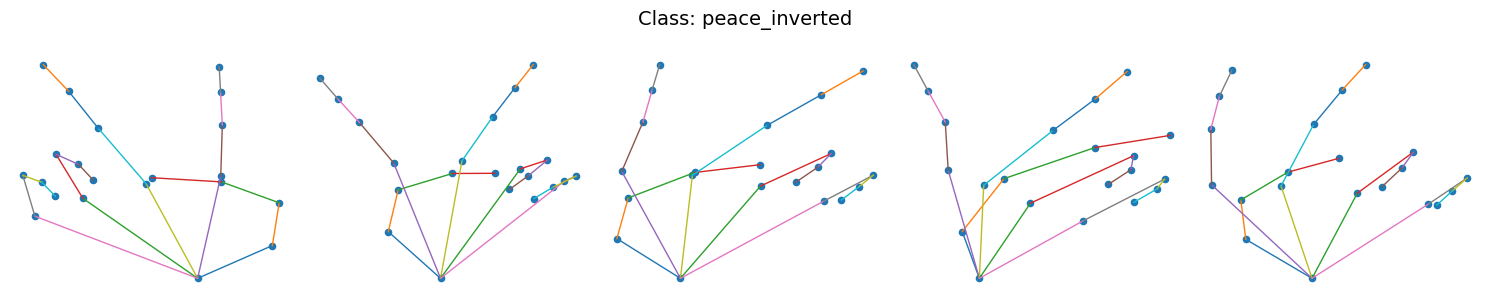

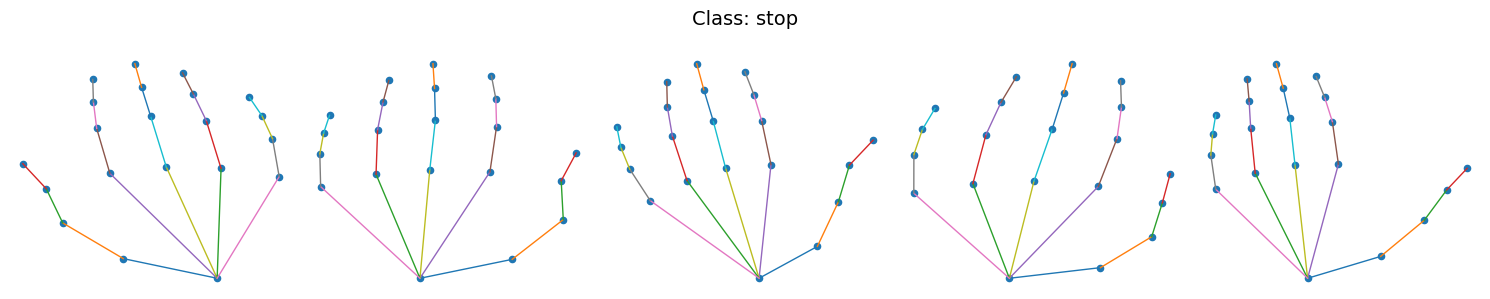

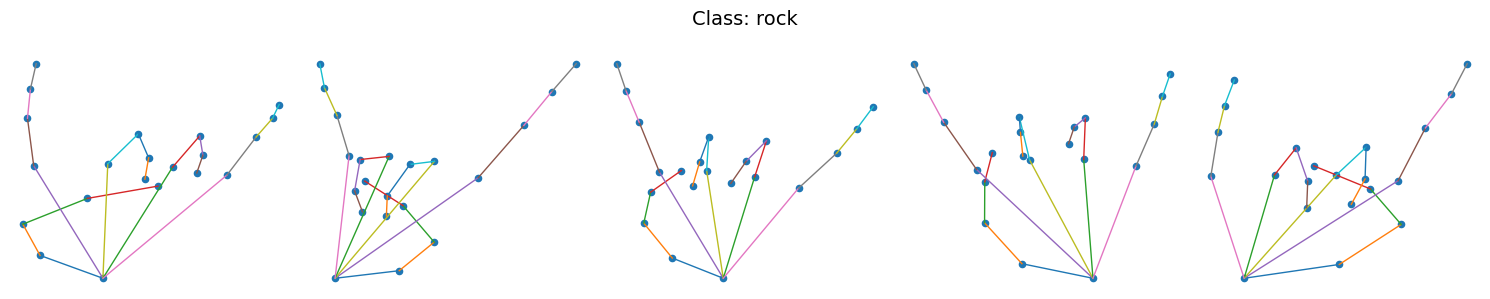

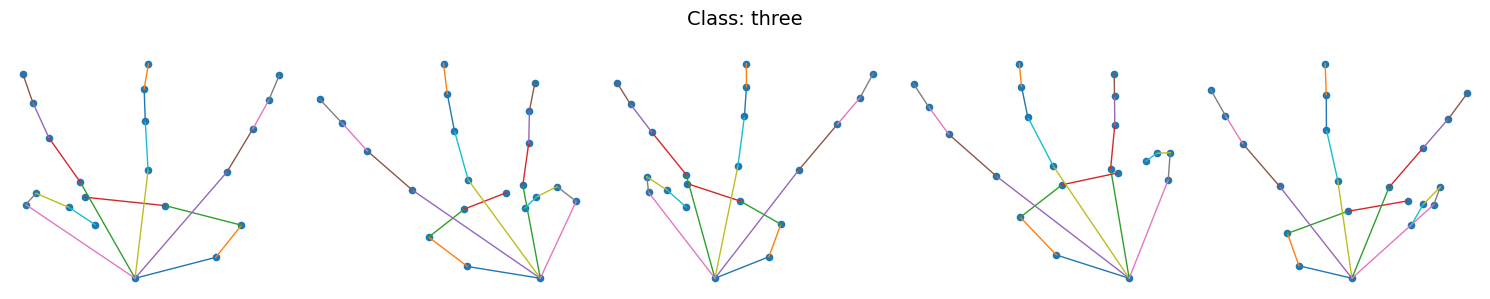

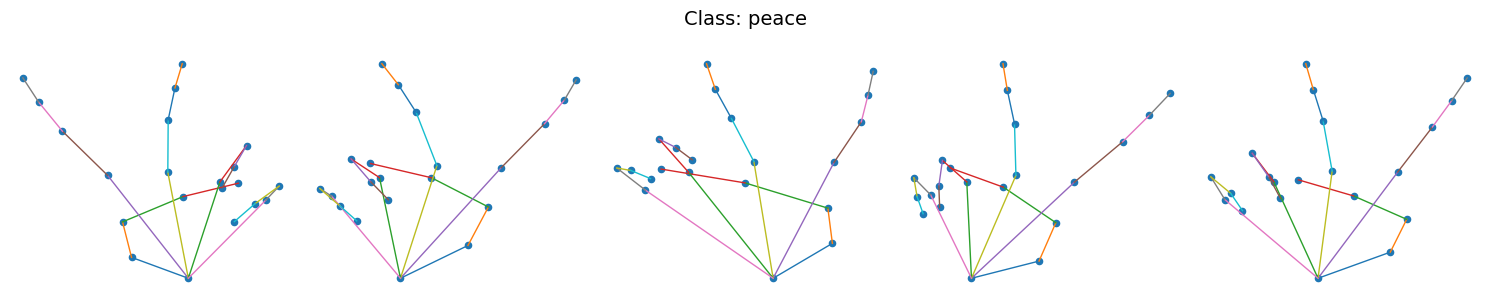

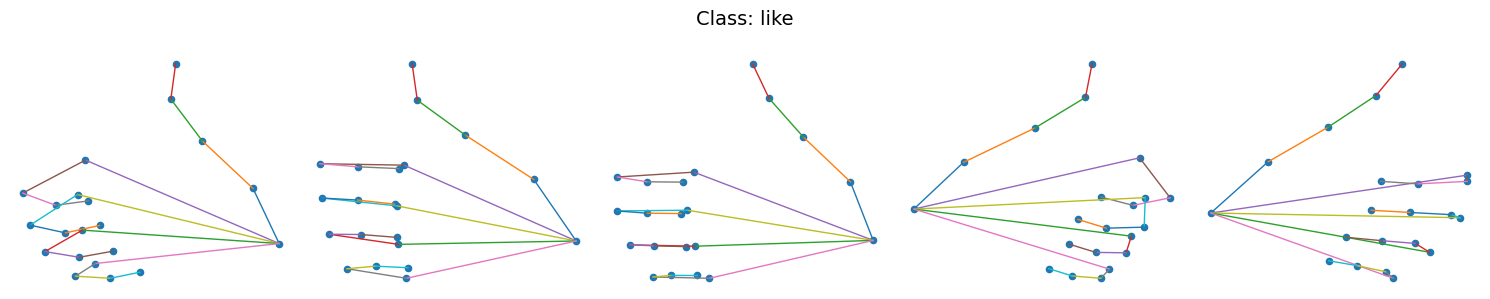

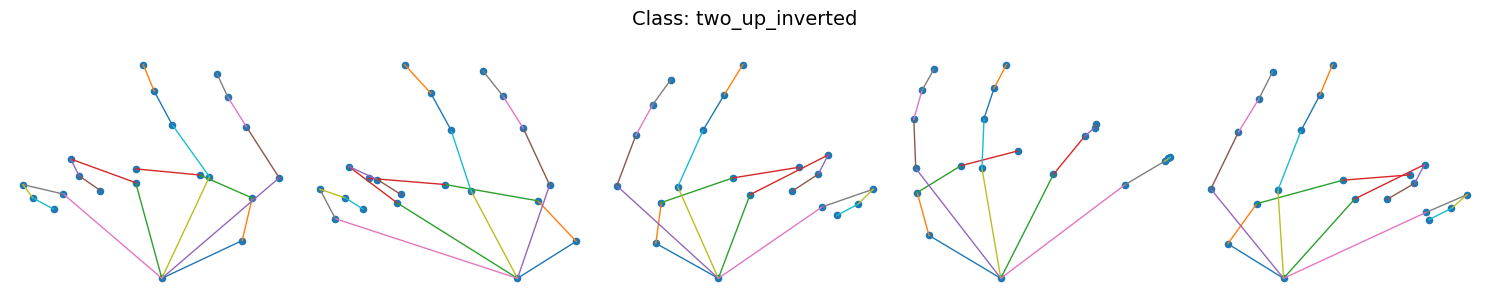

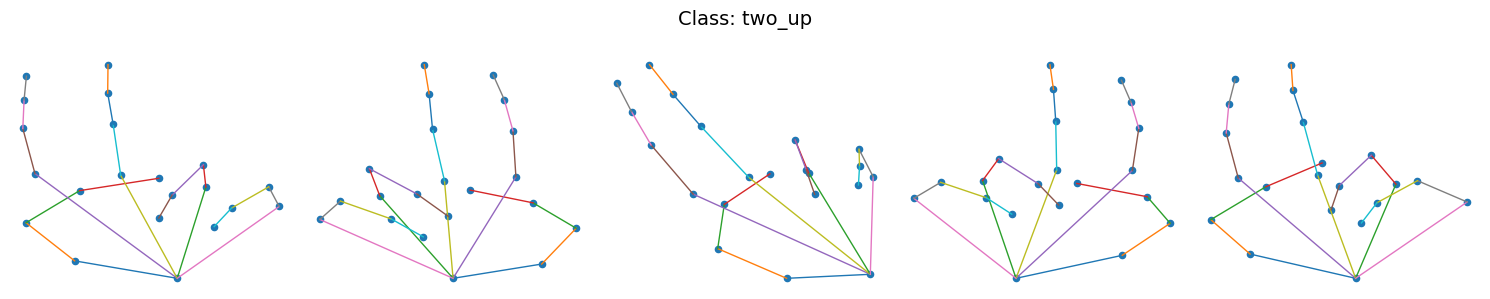

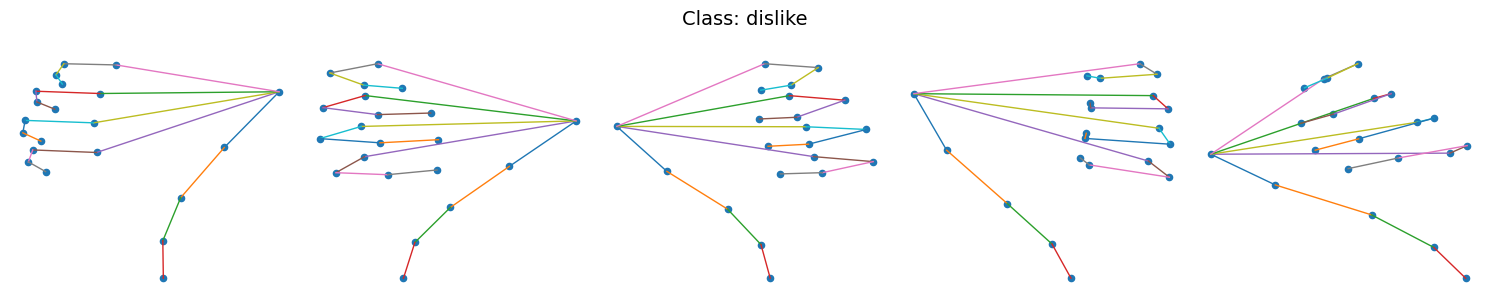

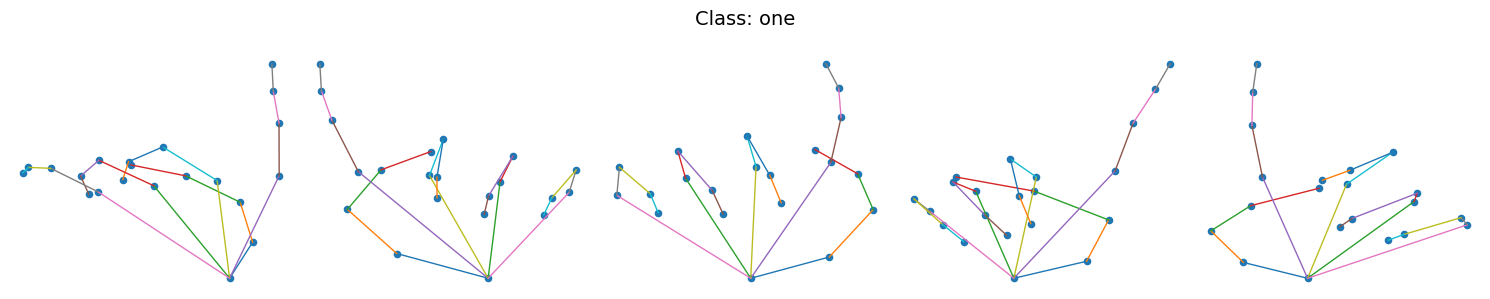

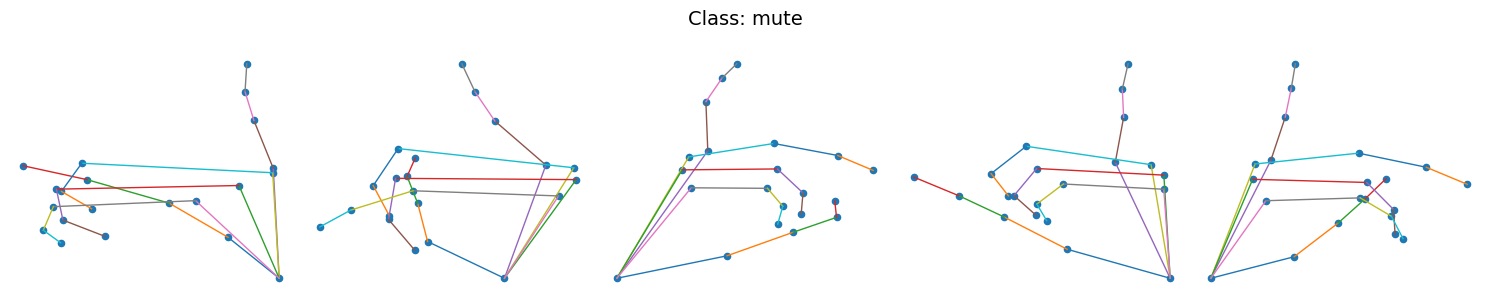

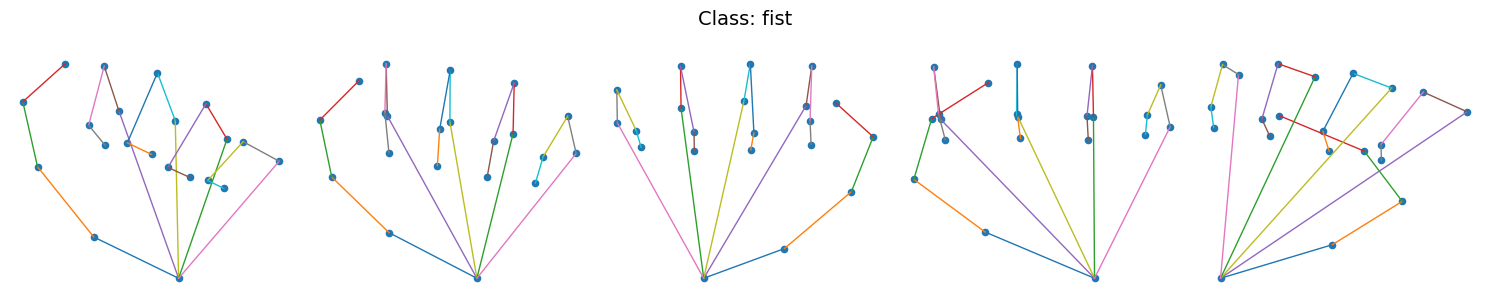

In [9]:
plot_class_distribution_bar(df)
plot_class_distribution_pie(df)
visualize_samples_per_class(df, n_samples=5)

In [10]:
df.describe()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,z18,x19,y19,z19,x20,y20,z20,x21,y21,z21
count,25675.000000,25675.000000,2.567500e+04,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,...,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000
mean,201.958632,260.158527,1.272461e-07,202.517396,252.115322,-0.009465,202.862982,240.645966,-0.015946,203.025267,...,-0.024129,201.792374,227.455598,-0.033751,201.811275,227.802576,-0.032208,201.874802,227.807287,-0.028828
std,90.500333,76.533210,2.737932e-07,84.770933,75.384692,0.010376,80.412089,74.721921,0.013973,79.647589,...,0.015658,94.046497,77.231210,0.020453,93.664595,78.441253,0.020877,93.547017,79.963438,0.021136
min,-36.050926,45.722923,-2.029987e-06,7.184681,51.256840,-0.096630,25.114323,45.489952,-0.155846,23.446340,...,-0.201897,0.198635,20.146784,-0.286821,3.278137,32.158108,-0.286470,-4.537216,23.226204,-0.262047
25%,124.110330,205.815955,-5.243216e-08,130.535930,197.999625,-0.015199,136.711035,187.018580,-0.023020,138.905815,...,-0.030728,126.828914,172.720395,-0.042726,126.887405,172.345465,-0.041957,126.356625,172.083795,-0.039220
50%,199.667850,255.181800,1.497277e-07,199.979520,247.113890,-0.008737,200.092760,235.776980,-0.014231,200.482040,...,-0.020969,197.579860,221.781480,-0.029942,197.591740,222.381150,-0.028510,197.453280,222.485230,-0.025269
75%,266.428480,304.991665,2.989988e-07,261.147460,296.850765,-0.002783,255.876355,284.925995,-0.007134,254.622765,...,-0.013661,268.103925,273.190770,-0.019987,267.745750,274.196885,-0.017971,267.324660,275.805220,-0.014294
max,633.556000,781.674440,1.876254e-06,606.232360,751.869450,0.076365,598.541300,719.365000,0.094131,607.999800,...,0.031774,632.923030,779.419900,0.078105,638.134770,760.854100,0.104580,641.788500,760.554900,0.118668


In [11]:
# remove z coordinates (depth)
df_no_z = df.drop(columns=[col for col in df.columns if col.startswith("z")])
df_no_z.columns

Index(['x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4', 'x5', 'y5', 'x6', 'y6',
       'x7', 'y7', 'x8', 'y8', 'x9', 'y9', 'x10', 'y10', 'x11', 'y11', 'x12',
       'y12', 'x13', 'y13', 'x14', 'y14', 'x15', 'y15', 'x16', 'y16', 'x17',
       'y17', 'x18', 'y18', 'x19', 'y19', 'x20', 'y20', 'x21', 'y21', 'label'],
      dtype='str')

In [12]:
# save data without z coordinates to a new CSV file
df_no_z.to_csv("../dataset/hand_landmarks_data_no_z.csv", index=False)

#### Data Split

In [13]:
df_no_z = pd.read_csv("../dataset/hand_landmarks_data_no_z.csv")
df_no_z.head()

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,...,y17,x18,y18,x19,y19,x20,y20,x21,y21,label
0,262.669980,257.30490,257.417540,247.109050,246.88297,241.71683,236.38454,241.45392,230.07666,243.94753,...,268.06952,236.51253,251.70618,223.34510,255.49069,215.04337,258.11475,208.00640,259.60867,call
1,83.351776,346.05910,81.925030,328.562350,90.08013,311.53525,95.64182,298.86063,94.47036,287.29877,...,336.64795,116.24508,341.94778,132.45161,341.79443,142.77359,342.82925,152.43170,343.01600,call
2,187.756970,260.23550,195.460570,241.506040,207.25954,223.67435,215.41362,209.03535,214.77287,196.60959,...,264.50546,230.10017,265.58417,250.30101,268.60294,262.42514,271.27664,272.98996,272.27222,call
3,114.976700,331.59424,114.503494,320.549960,116.63663,310.08100,117.68507,301.87410,116.76661,294.97780,...,324.40780,135.48584,329.05010,145.19545,329.35754,151.05319,329.71234,155.99036,329.54883,call
4,188.795290,141.72787,188.520900,127.947464,191.98288,111.01056,192.55252,98.68769,188.23956,90.39429,...,131.50262,213.10582,135.29321,226.69640,132.26324,234.83174,130.68414,241.58777,128.47719,call


#### Shuffle Data

In [14]:
# Shuffle rows
df_no_z_shuffled = df_no_z.sample(frac=1, random_state=42).reset_index(drop=True)
df_no_z_shuffled.head()

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,...,y17,x18,y18,x19,y19,x20,y20,x21,y21,label
0,79.715614,260.26358,91.60871,253.64946,100.54781,243.27113,97.48395,234.41556,90.62543,230.06052,...,236.18175,75.19887,228.38544,74.00697,216.62213,73.48679,209.77591,73.11707,203.82715,rock
1,226.261690,277.55453,237.56662,269.77377,240.77371,256.93408,235.87067,247.63600,229.59224,242.53925,...,257.34714,214.26520,255.15005,212.62480,247.80066,214.48814,251.42175,215.88370,255.70999,peace
2,108.700720,264.30460,122.13545,251.58296,127.82476,232.46172,128.51874,216.66292,126.92314,203.30570,...,170.37135,81.77484,225.13834,78.94733,208.78716,78.57565,197.98695,78.80962,188.28238,stop
3,137.140200,400.23010,141.37796,380.63370,149.56320,365.62930,156.94095,354.03750,160.72400,343.26587,...,395.23170,169.23932,408.05600,176.45819,402.70690,172.10204,401.68027,167.26057,403.47415,like
4,187.488950,219.66437,183.69350,208.93420,176.43134,197.00485,172.43100,187.58722,172.90733,179.21626,...,217.34808,170.27737,219.45801,155.92885,221.59377,147.87045,222.71083,141.71045,222.91737,call


In [15]:
# divide data into features and labels
features = df_no_z_shuffled.drop(columns=["label"])
labels = df_no_z_shuffled["label"]

print(f"features.shape: {features.shape}")
print(f"labels.shape: {labels.shape}")

features.shape: (25675, 42)
labels.shape: (25675,)


#### Feature Selection

In [16]:
# check the ranke of the dataframe matrix
# if rank < # festures, then there are redundant features
rank = np.linalg.matrix_rank(features.to_numpy())

print(f"Number of features: {features.shape[1]}")
print(f"Rank of feature matrix: {rank}")
print(f"Redundant(dependent) Features: {features.shape[1] - rank}")

Number of features: 42
Rank of feature matrix: 42
Redundant(dependent) Features: 0


In [47]:
# encode labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
labels_encoded = le.fit_transform(labels).astype("int64")

print(f"Encoded Labels:\n {le.classes_}")

# get the mapping of original labels to encoded labels
label_mapping = {
    original: encoded
    for original, encoded in zip(le.classes_, le.transform(le.classes_))
}

print(f"\nLabel Mapping:\n")

for k, v in label_mapping.items():
    print(f"Class {k}: Label {v}")

Encoded Labels:
 ['call' 'dislike' 'fist' 'four' 'like' 'mute' 'ok' 'one' 'palm' 'peace'
 'peace_inverted' 'rock' 'stop' 'stop_inverted' 'three' 'three2' 'two_up'
 'two_up_inverted']

Label Mapping:

Class call: Label 0
Class dislike: Label 1
Class fist: Label 2
Class four: Label 3
Class like: Label 4
Class mute: Label 5
Class ok: Label 6
Class one: Label 7
Class palm: Label 8
Class peace: Label 9
Class peace_inverted: Label 10
Class rock: Label 11
Class stop: Label 12
Class stop_inverted: Label 13
Class three: Label 14
Class three2: Label 15
Class two_up: Label 16
Class two_up_inverted: Label 17


In [54]:
encoder_dir = "./transfomers"

if not os.path.exists(encoder_dir):
    os.makedirs(encoder_dir)

joblib.dump(le, f"{encoder_dir}/label_encoder.pkl")

print("Encoder Saved Succefullly")

Encoder Saved Succefullly


In [48]:
# split data into train-dev-test sets
from sklearn.model_selection import train_test_split

# split into train and temp => test + dev
X_train, X_temp, y_train, y_temp = train_test_split(features, labels_encoded, test_size=0.2, random_state=42)

# split temp into dev and test sets
X_dev, X_test, y_dev, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"X_train.shape: {X_train.shape}")
print(f"X_temp.shape: {X_temp.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_temp.shape: {y_temp.shape}")

print()

print(f"X_dev.shape: {X_dev.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_dev.shape: {y_dev.shape}")
print(f"y_test.shape: {y_test.shape}")

X_train.shape: (20540, 42)
X_temp.shape: (5135, 42)
y_train.shape: (20540,)
y_temp.shape: (5135,)

X_dev.shape: (2567, 42)
X_test.shape: (2568, 42)
y_dev.shape: (2567,)
y_test.shape: (2568,)


In [ ]:
# save the splits to new CSV files
train_df = X_train.copy()
train_df["label"] = y_train.astype("int64")

dev_df = X_dev.copy()
dev_df["label"] = y_dev.astype("int64")

test_df = X_test.copy()
test_df["label"] = y_test.astype("int64")

# check if directory exists, if not create it

if not os.path.exists("../dataset/splits/v1/"):
    os.makedirs("../dataset/splits/v1")

splits_path = "../dataset/splits/v1"

train_df.to_csv(f"{splits_path}/hand_landmarks_train.csv", index=False)
dev_df.to_csv(f"{splits_path}/hand_landmarks_dev.csv", index=False)
test_df.to_csv(f"{splits_path}/hand_landmarks_test.csv", index=False)

### DQ

#### Check Missing Values (Landmarks)

In [20]:
df_no_z_shuffled[df_no_z_shuffled.isna().sum(axis=1) > 0]

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,...,y17,x18,y18,x19,y19,x20,y20,x21,y21,label


#### Check Duplicates

In [21]:
# over X_train
X_train.duplicated().sum()

np.int64(0)

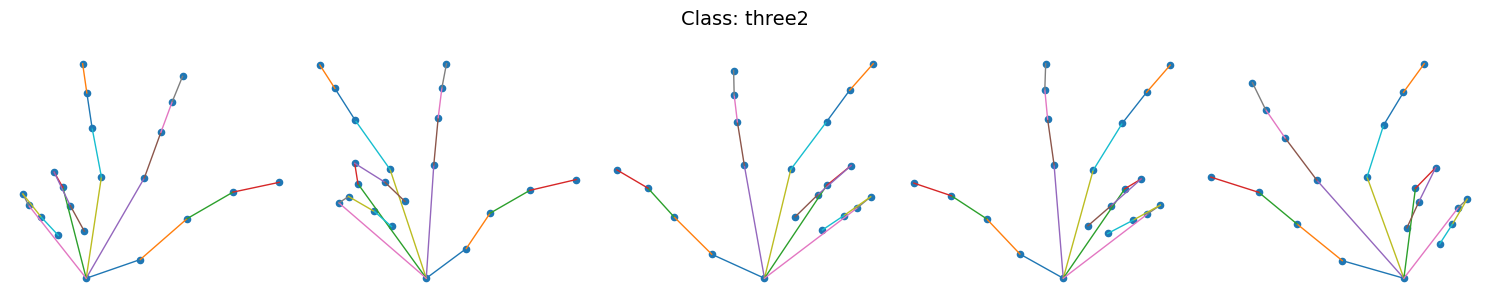

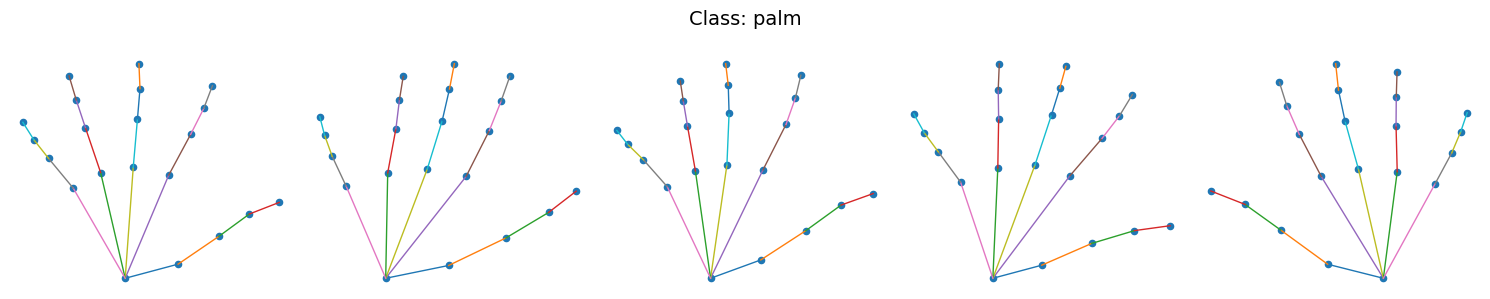

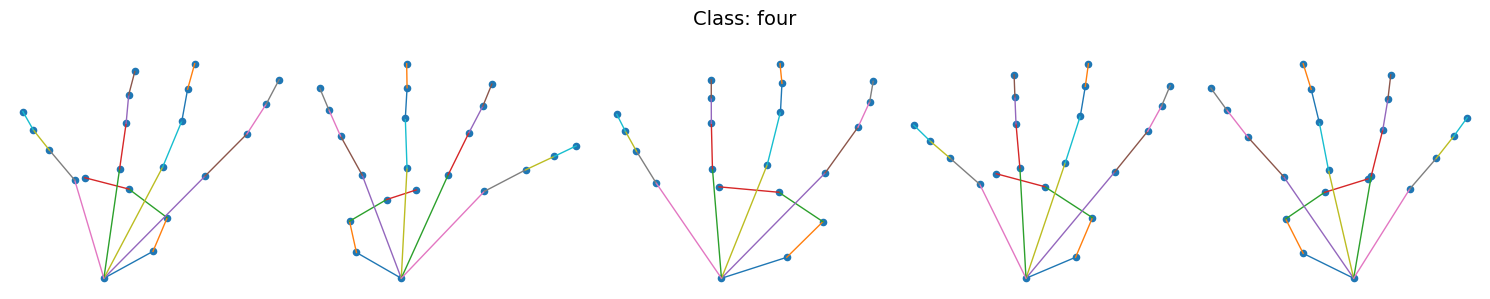

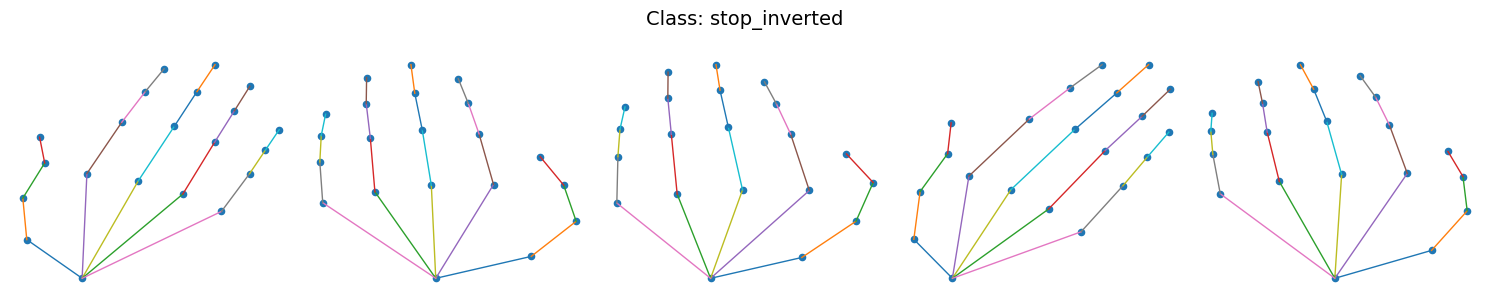

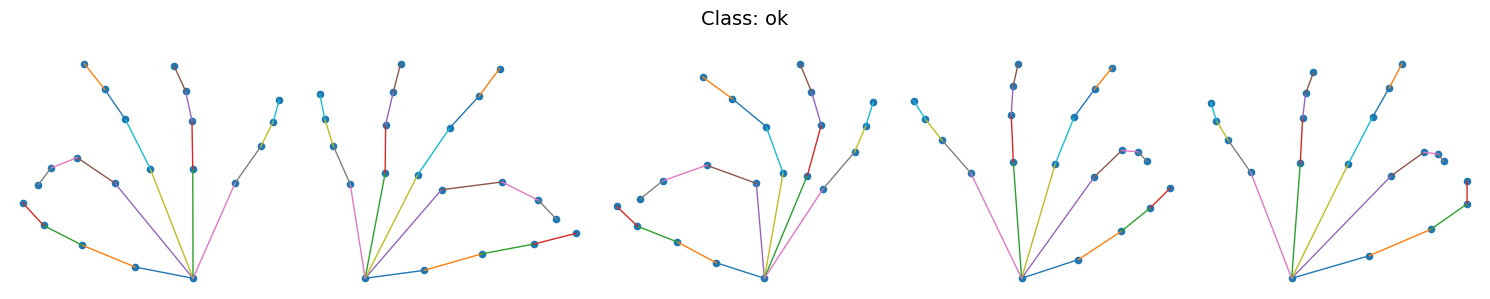

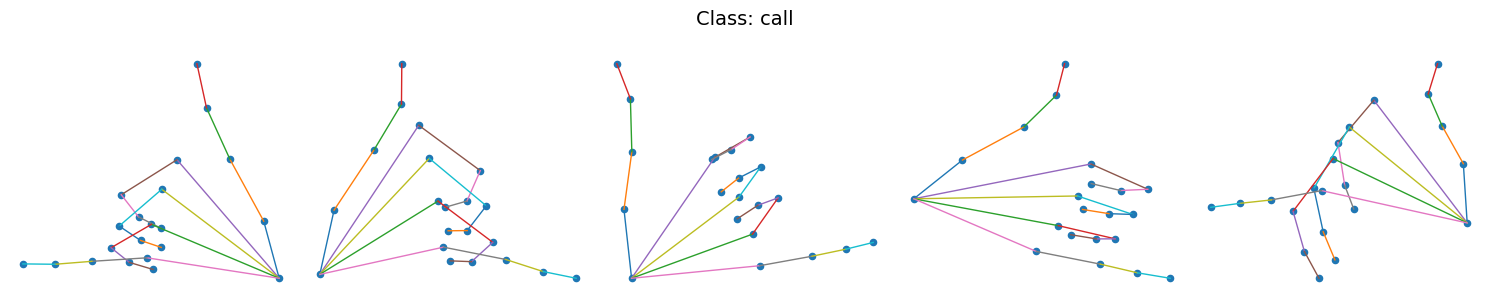

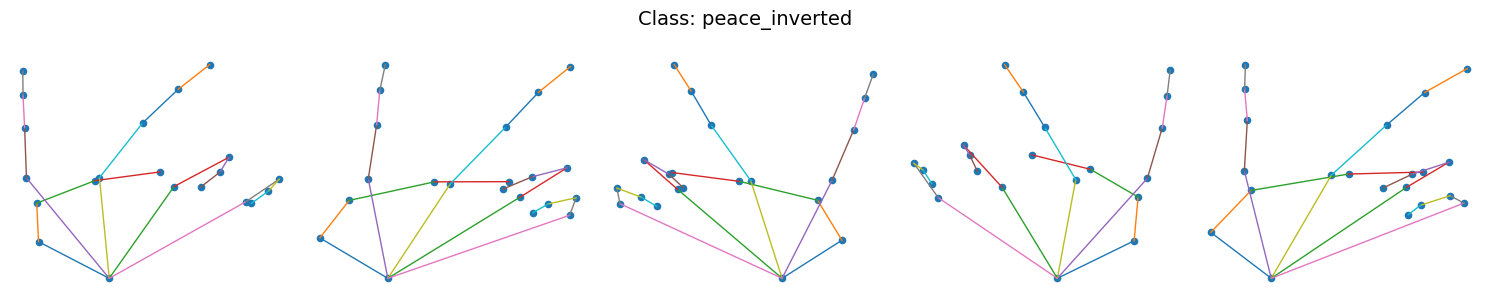

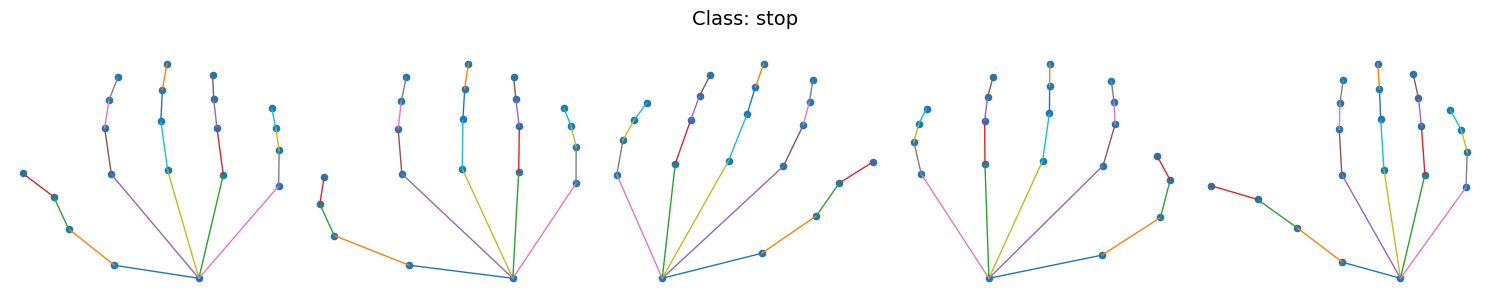

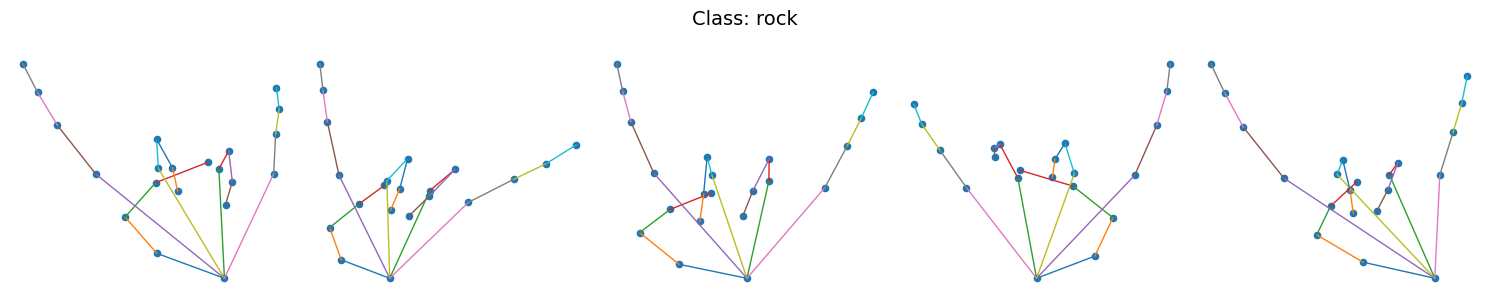

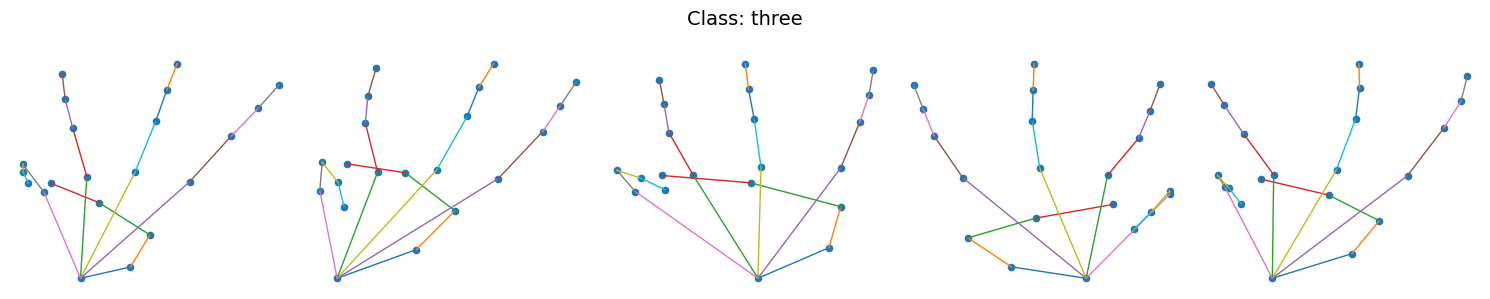

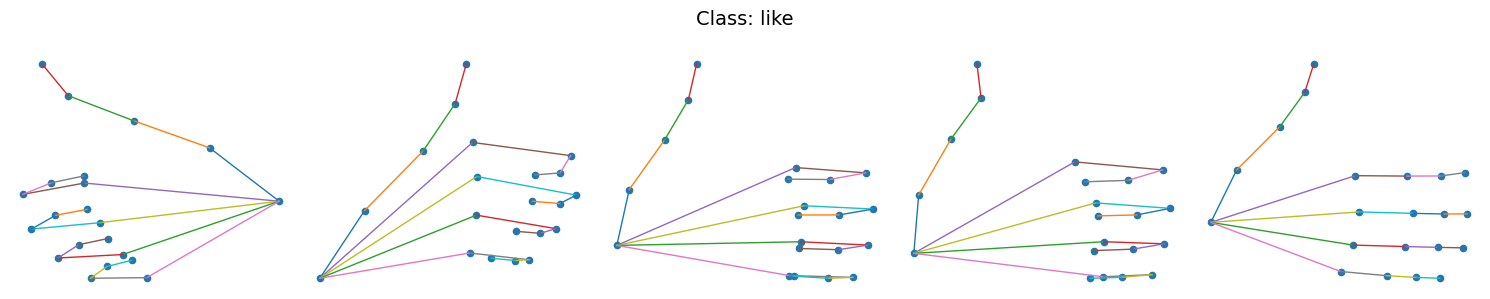

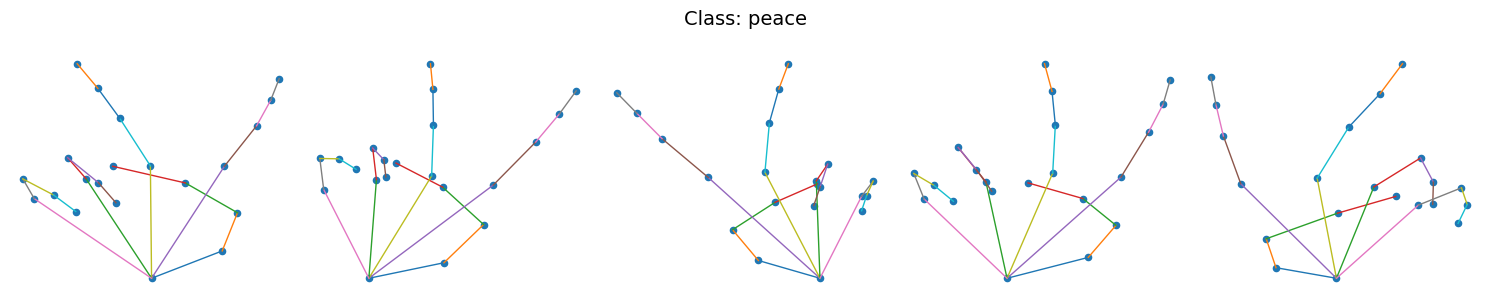

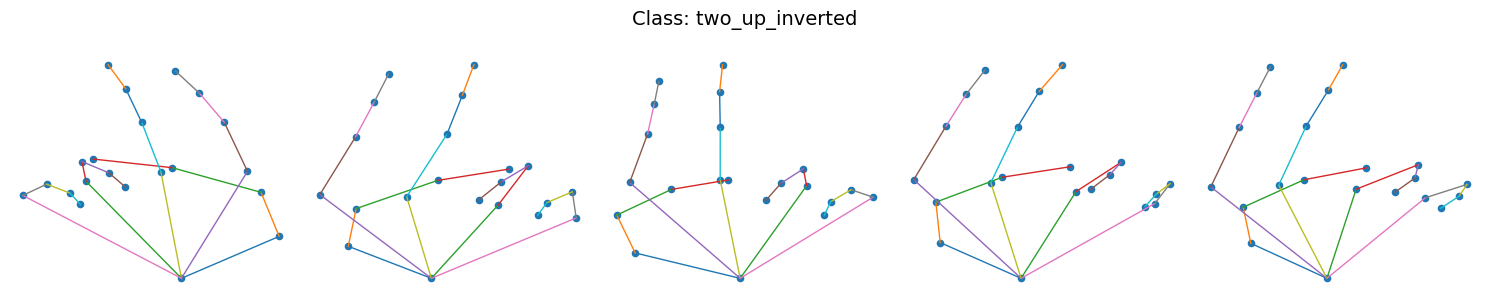

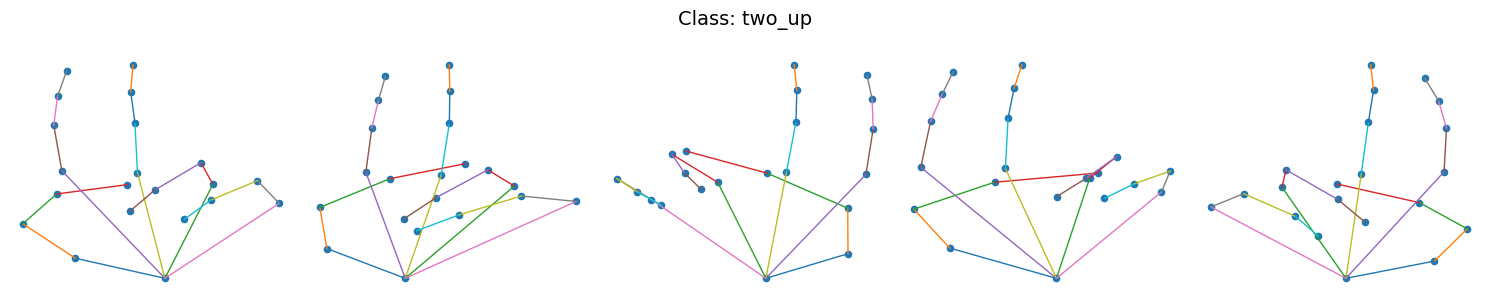

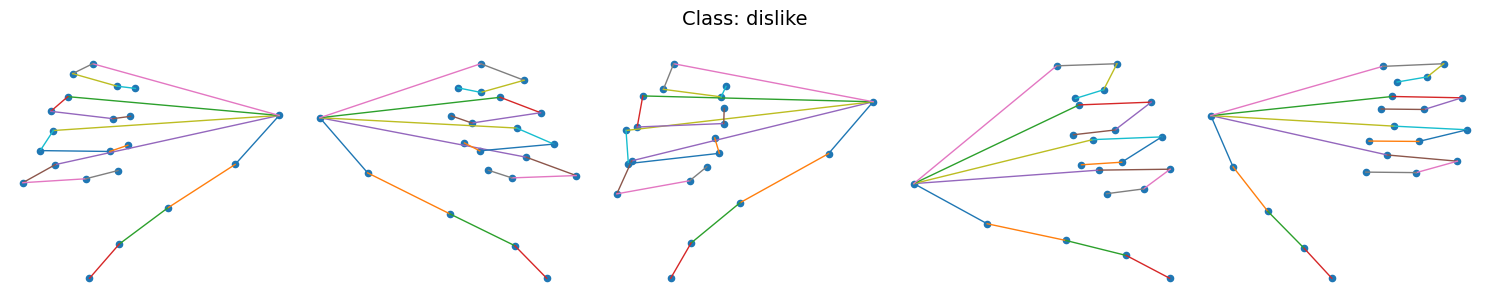

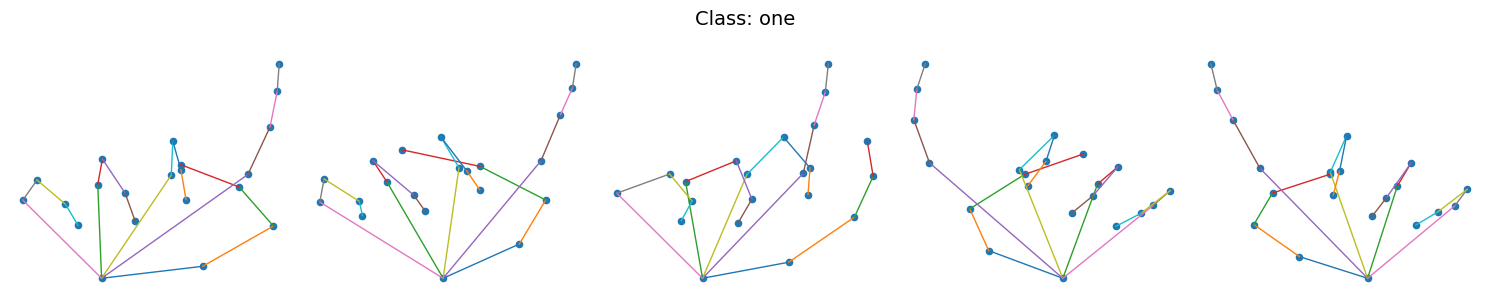

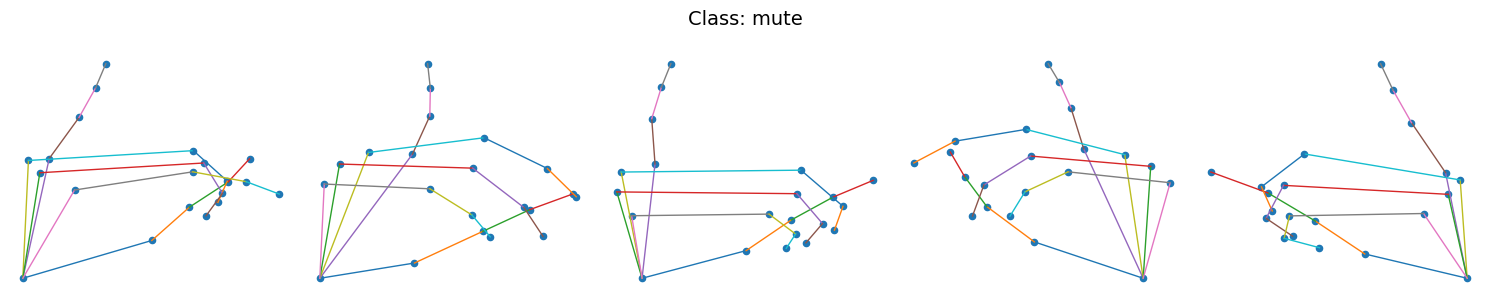

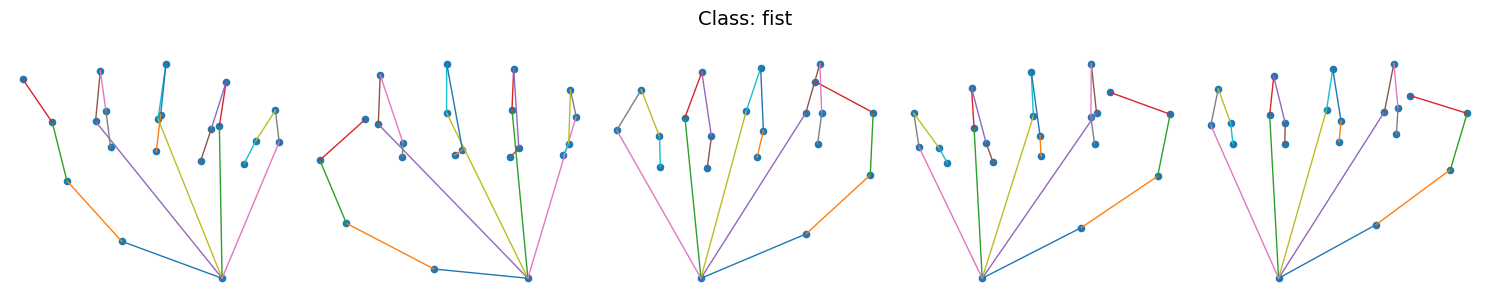

In [22]:
# sample images from training data
train_df = pd.concat([X_train, y_train], axis=1)

visualize_samples_per_class(train_df, n_samples=5)

In [23]:
# number of classes
print(f"Train Data: Number of samples per class:")
train_df["label"].value_counts()

Train Data: Number of samples per class:


label
three2             1345
palm               1333
four               1308
stop_inverted      1266
ok                 1239
call               1227
peace_inverted     1194
stop               1191
rock               1182
three              1164
like               1156
peace              1150
two_up_inverted    1077
two_up             1059
dislike            1034
one                 997
mute                866
fist                752
Name: count, dtype: int64

In [24]:
# the percentage of each class in the training data compared to the original data
original_labels_count = y.value_counts()
train_labels_count = y_train.value_counts()

print("Train Data: Labels Percentage:")
print(train_labels_count / original_labels_count)

NameError: name 'y' is not defined